# Convolutional Neural Network On MNIST DATA SET Using Layers API

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

In [2]:
tf.__version__

'1.3.0'

## Load Data

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [5]:
data.test.labels[:10]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [6]:
data.test.cls = np.argmax(data.test.labels, axis=1)
data.test.cls[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

## Data Dimensions

In [7]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [8]:
def plot_images(images, class_true, class_pred=None):
    assert len(images) == len(class_true) == 9
    
    # Create figure with 3x3 sub-plots.
    f, ax = plt.subplots(3, 3)
    f.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(ax.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if class_pred is None:
            xlabel = "True: {0}".format(class_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(class_true[i], class_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

### Plot few images to see how is look like

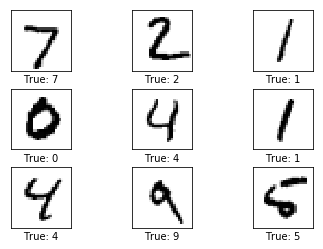

In [9]:
# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
class_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, class_true=class_true)

In [10]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')
x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_class = tf.argmax(y_true, axis=1)

In [11]:
net = x_image

In [12]:
net = tf.layers.conv2d(inputs=net, name='layer_conv1', padding='same',
                       filters=16, kernel_size=5, activation=tf.nn.relu)
layer_conv1 = net
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
net = tf.layers.conv2d(inputs=net, name='layer_conv2', padding='same',
                       filters=32, kernel_size=5, activation=tf.nn.relu)
layer_conv2 = net
net = tf.layers.max_pooling2d(inputs=net, pool_size=2, strides=2)
net = tf.layers.conv2d(inputs=net, name='layer_conv3', padding='same',
                       filters=64, kernel_size=5, activation=tf.nn.relu)
layer_conv3 = net
net = tf.contrib.layers.flatten(net)
net = tf.layers.dense(inputs=net, name='layer_fc1',
                      units=128, activation=tf.nn.relu)
net = tf.layers.dense(inputs=net, name='layer_fc_out',
                      units=num_classes, activation=None)

In [13]:
logits = net

In [14]:
y_pred = tf.nn.softmax(logits=logits)

In [15]:
y_pred_class = tf.argmax(y_pred, axis=1)

In [16]:
# Calculate Loss using cross-entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits)
loss = tf.reduce_mean(cross_entropy)

In [17]:
# OPtimizing the loss using the Adam Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [18]:
# Classification Accuracy
correct_prediction = tf.equal(y_pred_class, y_true_class)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
# Getting the weights
for var in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES):
    print(var)

<tf.Variable 'layer_conv1/kernel:0' shape=(5, 5, 1, 16) dtype=float32_ref>
<tf.Variable 'layer_conv1/bias:0' shape=(16,) dtype=float32_ref>
<tf.Variable 'layer_conv2/kernel:0' shape=(5, 5, 16, 32) dtype=float32_ref>
<tf.Variable 'layer_conv2/bias:0' shape=(32,) dtype=float32_ref>
<tf.Variable 'layer_conv3/kernel:0' shape=(5, 5, 32, 64) dtype=float32_ref>
<tf.Variable 'layer_conv3/bias:0' shape=(64,) dtype=float32_ref>
<tf.Variable 'layer_fc1/kernel:0' shape=(3136, 128) dtype=float32_ref>
<tf.Variable 'layer_fc1/bias:0' shape=(128,) dtype=float32_ref>
<tf.Variable 'layer_fc_out/kernel:0' shape=(128, 10) dtype=float32_ref>
<tf.Variable 'layer_fc_out/bias:0' shape=(10,) dtype=float32_ref>
<tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>
<tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>
<tf.Variable 'layer_conv1/kernel/Adam:0' shape=(5, 5, 1, 16) dtype=float32_ref>
<tf.Variable 'layer_conv1/kernel/Adam_1:0' shape=(5, 5, 1, 16) dtype=float32_ref>
<tf.Variable 'layer_conv1/bia

In [20]:
def get_weights_variable(layer_name):
    # Retrieve an existing variable named 'kernel' in the scope
    # with the given layer_name.
    # This is awkward because the TensorFlow function was
    # really intended for another purpose.

    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('kernel')

    return variable

In [21]:
weights_conv1 = get_weights_variable(layer_name='layer_conv1')
weights_conv2 = get_weights_variable(layer_name='layer_conv2')
weights_conv3 = get_weights_variable(layer_name='layer_conv3')

In [22]:
# Creating Tensorflow Session
session = tf.Session()
session.run(tf.global_variables_initializer())

train_batch_size = 64

In [23]:
# Counter for total number of iterations performed so far.
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    for i in range(total_iterations,
                   total_iterations + num_iterations):

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations.
        if i % 100 == 0:
            # Calculate the accuracy on the training-set.
            acc = session.run(accuracy, feed_dict=feed_dict_train)

            # Message for printing.
            msg = "Optimization Iteration: {0:>6}, Training Accuracy: {1:>6.1%}"

            # Print it.
            print(msg.format(i + 1, acc))

    # Update the total number of iterations performed.
    total_iterations += num_iterations

In [24]:
def plot_example_errors(class_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[incorrect]

    # Get the true classes for those images.
    class_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])
    
def plot_example_correct_classified(class_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    correct = (correct == True)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[correct]
    
    # Get the predicted classes for those images.
    class_pred = class_pred[correct]

    # Get the true classes for those images.
    class_true = data.test.cls[correct]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                class_true=class_true[0:9],
                class_pred=class_pred[0:9])

In [25]:
# Split the test-set into smaller batches of this size.
test_batch_size = 256

def print_test_accuracy(show_example_errors=False,show_example_correct=False):

    # Number of images in the test-set.
    num_test = len(data.test.images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    class_pred = np.zeros(shape=num_test, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_test:
        # The ending index for the next batch is denoted j.
        j = min(i + test_batch_size, num_test)

        # Get the images from the test-set between index i and j.
        images = data.test.images[i:j, :]

        # Get the associated labels.
        labels = data.test.labels[i:j, :]

        # Create a feed-dict with these images and labels.
        feed_dict = {x: images,
                     y_true: labels}

        # Calculate the predicted class using TensorFlow.
        class_pred[i:j] = session.run(y_pred_class, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Convenience variable for the true class-numbers of the test-set.
    class_true = data.test.cls

    # Create a boolean array whether each image is correctly classified.
    correct = (class_true == class_pred)

    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / num_test

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, correct_sum, num_test))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(class_pred=class_pred, correct=correct)
    # Plot some examples of classifications, if desired.
    if show_example_errors:
        print("Example Correct Classified:")
        plot_example_correct_classified(class_pred=class_pred, correct=correct)


# Performance before any optimization

In [26]:
print_test_accuracy()

Accuracy on Test-Set: 5.7% (566 / 10000)


# Performance After 1 Optimization

In [27]:
optimize(num_iterations=1)

Optimization Iteration:      1, Training Accuracy:   9.4%


In [28]:
print_test_accuracy()

Accuracy on Test-Set: 8.8% (883 / 10000)


# Performance after 100 optimizations

In [29]:
%%time
optimize(num_iterations=99)

Wall time: 22.1 s


Accuracy on Test-Set: 83.7% (8371 / 10000)
Example errors:


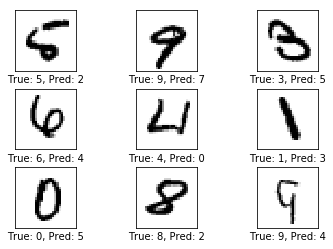

Example Correct Classified:


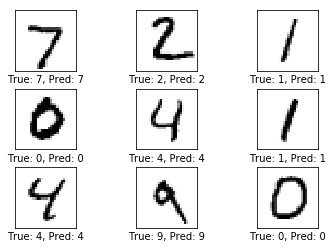

In [30]:
print_test_accuracy(show_example_errors=True, show_example_correct=True)

# Performance after 1000 Iterations

In [31]:
%%time
optimize(num_iterations=900)

Optimization Iteration:    101, Training Accuracy:  78.1%
Optimization Iteration:    201, Training Accuracy:  85.9%
Optimization Iteration:    301, Training Accuracy:  90.6%
Optimization Iteration:    401, Training Accuracy:  93.8%
Optimization Iteration:    501, Training Accuracy:  93.8%
Optimization Iteration:    601, Training Accuracy:  95.3%
Optimization Iteration:    701, Training Accuracy:  98.4%
Optimization Iteration:    801, Training Accuracy:  95.3%
Optimization Iteration:    901, Training Accuracy:  93.8%
Wall time: 3min 24s


Accuracy on Test-Set: 96.6% (9662 / 10000)
Example errors:


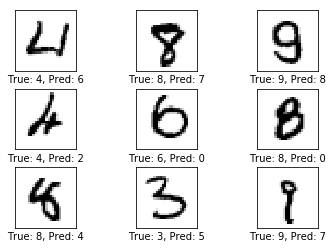

Example Correct Classified:


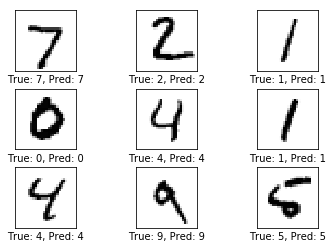

In [32]:
print_test_accuracy(show_example_errors=True, show_example_correct=True)

# Performance After 10,000 iterations

In [33]:
%%time
optimize(num_iterations=9000)

Optimization Iteration:   1001, Training Accuracy: 100.0%
Optimization Iteration:   1101, Training Accuracy:  89.1%
Optimization Iteration:   1201, Training Accuracy:  95.3%
Optimization Iteration:   1301, Training Accuracy:  98.4%
Optimization Iteration:   1401, Training Accuracy:  93.8%
Optimization Iteration:   1501, Training Accuracy:  96.9%
Optimization Iteration:   1601, Training Accuracy:  98.4%
Optimization Iteration:   1701, Training Accuracy: 100.0%
Optimization Iteration:   1801, Training Accuracy: 100.0%
Optimization Iteration:   1901, Training Accuracy:  96.9%
Optimization Iteration:   2001, Training Accuracy: 100.0%
Optimization Iteration:   2101, Training Accuracy:  93.8%
Optimization Iteration:   2201, Training Accuracy: 100.0%
Optimization Iteration:   2301, Training Accuracy: 100.0%
Optimization Iteration:   2401, Training Accuracy: 100.0%
Optimization Iteration:   2501, Training Accuracy: 100.0%
Optimization Iteration:   2601, Training Accuracy: 100.0%
Optimization I

Accuracy on Test-Set: 99.2% (9915 / 10000)
Example errors:


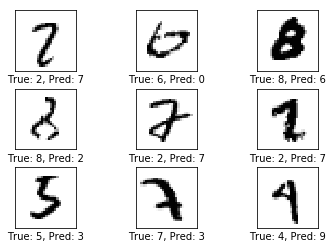

Example Correct Classified:


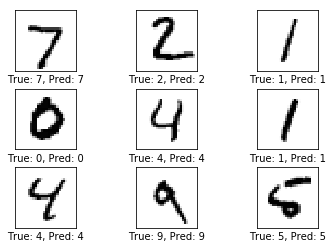

In [34]:
print_test_accuracy(show_example_errors=True,show_example_correct=True)

# Ploting weights

In [35]:

def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.
    
    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    f, ax = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(ax.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [36]:
# Function to plot the convolution layer results
def plot_conv_layer(layer, image):
    # Assume layer is a TensorFlow op that outputs a 4-dim tensor
    # which is the output of a convolutional layer,
    # e.g. layer_conv1 or layer_conv2.

    # Create a feed-dict containing just one image.
    # Note that we don't need to feed y_true because it is
    # not used in this calculation.
    feed_dict = {x: [image]}

    # Calculate and retrieve the output values of the layer
    # when inputting that image.
    values = session.run(layer, feed_dict=feed_dict)

    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    f, ax = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(ax.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [37]:
# Helper-function for plotting an image.
def plot_image(image):
    plt.imshow(image.reshape(img_shape),
               interpolation='nearest',
               cmap='binary')

    plt.show()

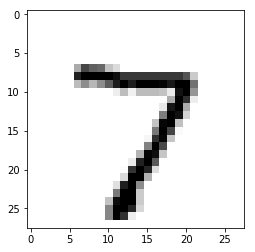

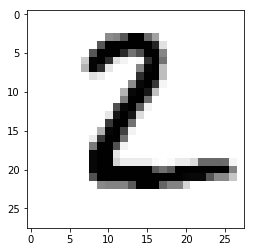

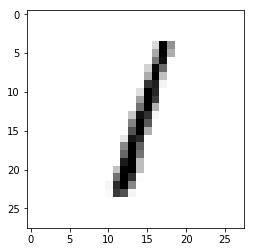

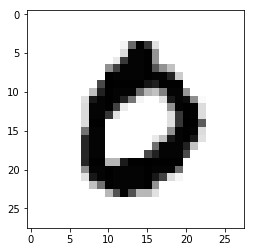

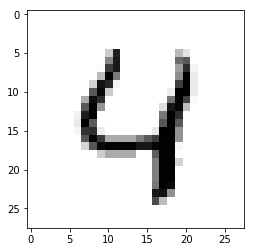

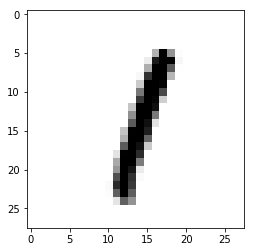

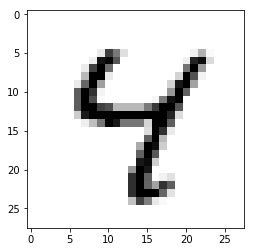

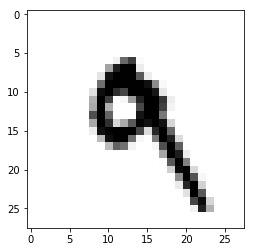

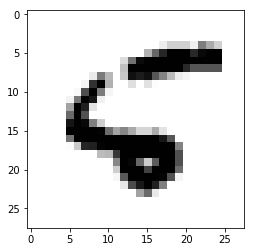

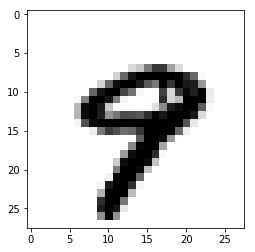

In [38]:
# Plotting an image
for i in range(0,10):
    image1 = data.test.images[i]
    plot_image(image1)

# Convolution layer 1

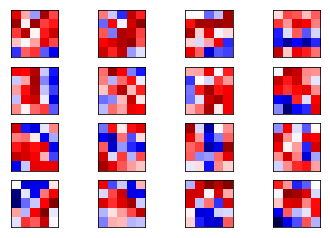

In [39]:
plot_conv_weights(weights=weights_conv1)

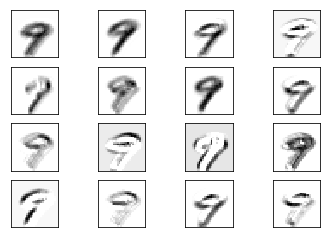

In [40]:
plot_conv_layer(layer=layer_conv1, image=image1)

# Convolution Layer 2

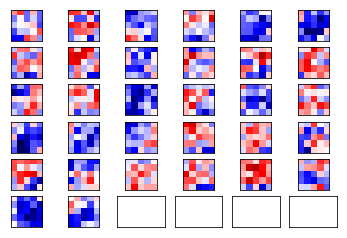

In [41]:
plot_conv_weights(weights=weights_conv2, input_channel=3)

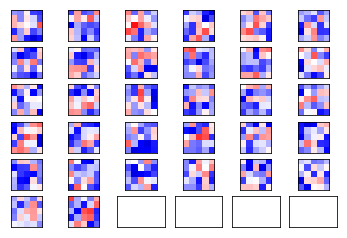

In [42]:
plot_conv_weights(weights=weights_conv2, input_channel=1)

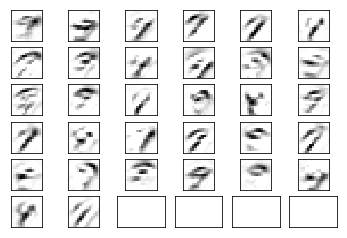

In [43]:
plot_conv_layer(layer=layer_conv2, image=image1)

# Convolution Layer 3

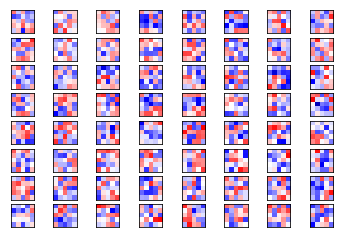

In [44]:
plot_conv_weights(weights=weights_conv3, input_channel=0)

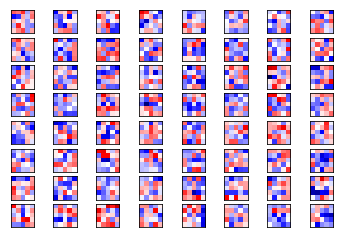

In [45]:
plot_conv_weights(weights=weights_conv3, input_channel=1)

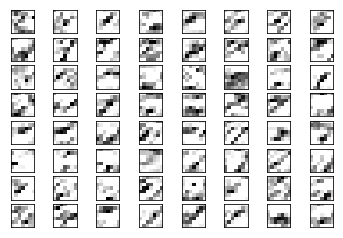

In [46]:
plot_conv_layer(layer=layer_conv3, image=image1)